In [ ]:
# This notebook uses sympy to calculate the appropriate coefficients 
# for the derivative stencils for the various cases used in engrenage, 
# and checks the Grid and Derivative classes work as expected

# restart the kernel to clear past work
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
import numpy as np
from sympy import symbols, simplify, pprint, diff, expand, collect
import matplotlib.pyplot as plt
import sys
%matplotlib inline

sys.path.append('../')
from source.Grid import *
from source.Derivatives import *

In [2]:
# Set up a Grid class where the spacing is 1 evenly, check result
max_r = 10.5
num_points = 14
log_factor = 1.0
my_grid = Grid(max_r, num_points, log_factor)
print(my_grid.derivatives.r_vector)
#print(12*my_grid.derivatives.d1_matrix)
#print(12*my_grid.derivatives.d2_matrix)

[-2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]


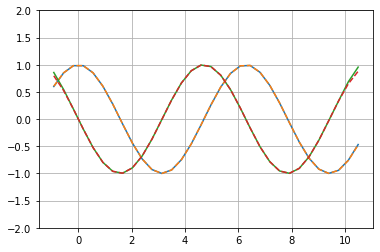

In [5]:
# Now test the derivatives on a function
# Set up a Grid class where the spacing is 1 evenly, check result
max_r = 10.5
num_points = 32
log_factor = 1.0
my_grid = Grid(max_r, num_points, log_factor)
#print(my_grid.derivatives.r_vector)
r = my_grid.r_vector
y = np.sin(r)
dydr = np.dot(my_grid.derivatives.d1_matrix, y)

plt.plot(r, dydr, '-')
plt.plot(r, np.cos(r), '--')

d2ydr2 = np.dot(my_grid.derivatives.d2_matrix, y)

plt.plot(r, d2ydr2, '-')
plt.plot(r, -np.sin(r), '--')

plt.ylim([-2,2])
plt.grid()

In [ ]:
# Check the finite derivatives for a fixed spacing dx, centered derivative
# using 5 points (so O(dx^4) accurate)

# Construct the polynomial using sympy
x = symbols('x')
deltax = symbols('dx')
x3 = symbols('x3')
x2 = x3-deltax
x1 = x2-deltax
x4 = x3+deltax
x5 = x4+deltax
f1 = symbols('f1')
f2 = symbols('f2')
f3 = symbols('f3')
f4 = symbols('f4')
f5 = symbols('f5')

L1 = (x - x2 ) / (x1 - x2) * (x - x3 ) / (x1 - x3)* (x - x4) / (x1 - x4) * (x - x5 ) / (x1 - x5)
L2 = (x - x1 ) / (x2 - x1) * (x - x3 ) / (x2 - x3)* (x - x4 ) / (x2 - x4)* (x - x5 ) / (x2 - x5)
L3 = (x - x1 ) / (x3 - x1) * (x - x2 ) / (x3 - x2)* (x - x4 ) / (x3 - x4)* (x - x5 ) / (x3 - x5)
L4 = (x - x1 ) / (x4 - x1) * (x - x2 ) / (x4 - x2)* (x - x3 ) / (x4 - x3)* (x - x5 ) / (x4 - x5)
L5 = (x - x1 ) / (x5 - x1) * (x - x2 ) / (x5 - x2)* (x - x3 ) / (x5 - x3)* (x - x4 ) / (x5 - x4)
P = f1 * L1 + f2 * L2 + f3 * L3 + f4 * L4 + f5 * L5
#print("Using sympy we get the polynomial", simplify(P))
#pprint(simplify(P))

# Now take the derivative twice
dPdx = diff(P, x)
#print("Its first derivative is", simplify(dPdx))

d2Pdx2 = diff(dPdx, x)
#print("Its second derivative is", simplify(d2Pdx2))
#pprint(simplify(dPdx))

# Now find the value at the central point x3
dPdx_at_x3 = dPdx.subs(x, x3)
d2Pdx2_at_x3 = d2Pdx2.subs(x, x3)
print("Its first derivative at x3 is", simplify(dPdx_at_x3))
print("Its second derivative at x3 is", simplify(d2Pdx2_at_x3))
print("This gives the first derivative stencil \n")
pprint(simplify(dPdx_at_x3))
print("This gives the second derivative stencil \n")
pprint(simplify(d2Pdx2_at_x3))

In [ ]:
# Now for the logarithmic case

# Check the finite derivatives for log factor of c, centered derivative
# using 5 points (so O(dx^4) accurate)

# Construct the polynomial using sympy
x = symbols('x')
c = symbols('c')
dx = symbols('dx')
x1 = dx/2
x2 = x1+(c*dx)
x3 = x2+(c*c*dx)
x4 = x3+(c*c*c*dx)
x5 = x4+(c*c*c*c*dx)
f1 = symbols('f1')
f2 = symbols('f2')
f3 = symbols('f3')
f4 = symbols('f4')
f5 = symbols('f5')

L1 = (x - x2 ) / (x1 - x2) * (x - x3 ) / (x1 - x3)* (x - x4) / (x1 - x4) * (x - x5 ) / (x1 - x5)
L2 = (x - x1 ) / (x2 - x1) * (x - x3 ) / (x2 - x3)* (x - x4 ) / (x2 - x4)* (x - x5 ) / (x2 - x5)
L3 = (x - x1 ) / (x3 - x1) * (x - x2 ) / (x3 - x2)* (x - x4 ) / (x3 - x4)* (x - x5 ) / (x3 - x5)
L4 = (x - x1 ) / (x4 - x1) * (x - x2 ) / (x4 - x2)* (x - x3 ) / (x4 - x3)* (x - x5 ) / (x4 - x5)
L5 = (x - x1 ) / (x5 - x1) * (x - x2 ) / (x5 - x2)* (x - x3 ) / (x5 - x3)* (x - x4 ) / (x5 - x4)
P = f1 * L1 + f2 * L2 + f3 * L3 + f4 * L4 + f5 * L5
#print("Using sympy we get the polynomial", simplify(P))
#pprint(simplify(P))

# Now take the derivative twice
dPdx = diff(P, x)
#print("Its first derivative is", simplify(dPdx))

d2Pdx2 = diff(dPdx, x)
#print("Its second derivative is", simplify(d2Pdx2))
#pprint(simplify(dPdx))

# Now find the value at the central point x3
dPdx_at_x3 = dPdx.subs(x, x3)
d2Pdx2_at_x3 = d2Pdx2.subs(x, x3)
#print("Its first derivative at x2 is", simplify(dPdx_at_x3))
#print("Its second derivative at x2 is", simplify(d2Pdx2_at_x3))
#print("This gives the first derivative stencil \n")
#pprint(simplify(dPdx_at_x3))
#print("This gives the second derivative stencil \n")
#pprint(simplify(d2Pdx2_at_x3))

# Easier to isolate out the terms one by one - coeff of f5 first
f5_dPdx_at_x3 = dPdx_at_x3.subs(f1, 0)
f5_dPdx_at_x3 = f5_dPdx_at_x3.subs(f2, 0)
f5_dPdx_at_x3 = f5_dPdx_at_x3.subs(f3, 0)
f5_dPdx_at_x3 = f5_dPdx_at_x3.subs(f4, 0)
f5_dPdx_at_x3 = simplify(f5_dPdx_at_x3)
dR_at_x3 = (c*c*dx)
print("The coefficient of the f5 term in the first derivative stencil is \n")
pprint(f5_dPdx_at_x3 * dR_at_x3)

print("\n In the case where c is 1 we can check it matches the above:")
pprint(simplify(((dPdx_at_x3 * dR_at_x3).subs(c,1))))

In [ ]:
# check the form matches the simpler one used in the code
# (sympy not great at simplifying)
check = -f5/(c**2 * (1 + c) *(1 + c**2) * (1 + c + c**2))
simplify(f5_dPdx_at_x3 * dR_at_x3 - check)

In [10]:
# Check the finite derivatives for one sided derivs with 4 points
# using 4 points (so O(dx^3) accurate)

# Construct the polynomial using sympy
x = symbols('x')
c = symbols('c')
dx = symbols('dx')
x1 = dx/2
x2 = x1+(c*dx)
x3 = x2+(c*c*dx)
x4 = x3+(c*c*c*dx)
f1 = symbols('f1')
f2 = symbols('f2')
f3 = symbols('f3')
f4 = symbols('f4')

L1 = (x - x2 ) / (x1 - x2) * (x - x3 ) / (x1 - x3)* (x - x4) / (x1 - x4) 
L2 = (x - x1 ) / (x2 - x1) * (x - x3 ) / (x2 - x3)* (x - x4 ) / (x2 - x4)
L3 = (x - x1 ) / (x3 - x1) * (x - x2 ) / (x3 - x2)* (x - x4 ) / (x3 - x4)
L4 = (x - x1 ) / (x4 - x1) * (x - x2 ) / (x4 - x2)* (x - x3 ) / (x4 - x3)
P = f1 * L1 + f2 * L2 + f3 * L3 + f4 * L4
#print("Using sympy we get the polynomial", simplify(P))
#pprint(simplify(P))

# Now take the derivative twice
dPdx = diff(P, x)
#print("Its first derivative is", simplify(dPdx))

d2Pdx2 = diff(dPdx, x)
#print("Its second derivative is", simplify(d2Pdx2))
#pprint(simplify(dPdx))

# Now find the value at the end point x4 for d1
dPdx_at_x4 = dPdx.subs(x, x4)
# Easier to isolate out the terms one by one - coeff of f1 first
f1_dPdx_at_x4 = dPdx_at_x4.subs(f2, 0)
f1_dPdx_at_x4 = f1_dPdx_at_x4.subs(f3, 0)
f1_dPdx_at_x4 = f1_dPdx_at_x4.subs(f4, 0)
f1_dPdx_at_x4 = simplify(f1_dPdx_at_x4)
dR_at_x4 = (c*c*c*dx)
print("The coefficient of the f1 term in the first derivative stencil is \n")
pprint(f1_dPdx_at_x4 * dR_at_x4)

# Easier to isolate out the terms one by one - coeff of f2
f2_dPdx_at_x4 = dPdx_at_x4.subs(f1, 0)
f2_dPdx_at_x4 = f2_dPdx_at_x4.subs(f3, 0)
f2_dPdx_at_x4 = f2_dPdx_at_x4.subs(f4, 0)
f2_dPdx_at_x4 = simplify(f2_dPdx_at_x4)
dR_at_x4 = (c*c*c*dx)
print("The coefficient of the f2 term in the first derivative stencil is \n")
pprint(f2_dPdx_at_x4 * dR_at_x4)

# Easier to isolate out the terms one by one - coeff of f3
f3_dPdx_at_x4 = dPdx_at_x4.subs(f1, 0)
f3_dPdx_at_x4 = f3_dPdx_at_x4.subs(f2, 0)
f3_dPdx_at_x4 = f3_dPdx_at_x4.subs(f4, 0)
f3_dPdx_at_x4 = simplify(f3_dPdx_at_x4)
dR_at_x4 = (c*c*c*dx)
print("The coefficient of the f3 term in the first derivative stencil is \n")
pprint(f3_dPdx_at_x4 * dR_at_x4)

# Easier to isolate out the terms one by one - coeff of f4
f4_dPdx_at_x4 = dPdx_at_x4.subs(f1, 0)
f4_dPdx_at_x4 = f4_dPdx_at_x4.subs(f2, 0)
f4_dPdx_at_x4 = f4_dPdx_at_x4.subs(f3, 0)
f4_dPdx_at_x4 = simplify(f4_dPdx_at_x4)
dR_at_x4 = (c*c*c*dx)
print("The coefficient of the f4 term in the first derivative stencil is \n")
pprint(f4_dPdx_at_x4 * dR_at_x4)

The coefficient of the f1 term in the first derivative stencil is 

   5      
 -c ⋅f₁   
──────────
 2        
c  + c + 1
The coefficient of the f2 term in the first derivative stencil is 

 2    ⎛ 2        ⎞
c ⋅f₂⋅⎝c  + c + 1⎠
──────────────────
      c + 1       
The coefficient of the f3 term in the first derivative stencil is 

    ⎛ 2        ⎞
-f₃⋅⎝c  + c + 1⎠
The coefficient of the f4 term in the first derivative stencil is 

   ⎛   3      2          ⎞
f₄⋅⎝3⋅c  + 4⋅c  + 3⋅c + 1⎠
──────────────────────────
    3      2              
   c  + 2⋅c  + 2⋅c + 1    


In [11]:
# Now find the value at the end point x4 for d2
d2Pdx2_at_x4 = d2Pdx2.subs(x, x4)
# Easier to isolate out the terms one by one - coeff of f1 first
f1_d2Pdx2_at_x4 = d2Pdx2_at_x4.subs(f2, 0)
f1_d2Pdx2_at_x4 = f1_d2Pdx2_at_x4.subs(f3, 0)
f1_d2Pdx2_at_x4 = f1_d2Pdx2_at_x4.subs(f4, 0)
f1_d2Pdx2_at_x4 = simplify(f1_d2Pdx2_at_x4)
dR_at_x4 = (c*c*c*dx)
print("The coefficient of the f1 term in the 2nd derivative stencil is \n")
pprint(f1_d2Pdx2_at_x4 * dR_at_x4)

# Easier to isolate out the terms one by one - coeff of f2
f2_d2Pdx2_at_x4 = d2Pdx2_at_x4.subs(f1, 0)
f2_d2Pdx2_at_x4 = f2_d2Pdx2_at_x4.subs(f3, 0)
f2_d2Pdx2_at_x4 = f2_d2Pdx2_at_x4.subs(f4, 0)
f2_d2Pdx2_at_x4 = simplify(f2_d2Pdx2_at_x4)
dR_at_x4 = (c*c*c*dx)
print("The coefficient of the f2 term in the 2nd derivative stencil is \n")
pprint(f2_d2Pdx2_at_x4 * dR_at_x4)

# Easier to isolate out the terms one by one - coeff of f3
f3_d2Pdx2_at_x4 = d2Pdx2_at_x4.subs(f1, 0)
f3_d2Pdx2_at_x4 = f3_d2Pdx2_at_x4.subs(f2, 0)
f3_d2Pdx2_at_x4 = f3_d2Pdx2_at_x4.subs(f4, 0)
f3_d2Pdx2_at_x4 = simplify(f3_d2Pdx2_at_x4)
dR_at_x4 = (c*c*c*dx)
print("The coefficient of the f3 term in the 2nd derivative stencil is \n")
pprint(f3_d2Pdx2_at_x4 * dR_at_x4)

# Easier to isolate out the terms one by one - coeff of f4
f4_d2Pdx2_at_x4 = d2Pdx2_at_x4.subs(f1, 0)
f4_d2Pdx2_at_x4 = f4_d2Pdx2_at_x4.subs(f2, 0)
f4_d2Pdx2_at_x4 = f4_d2Pdx2_at_x4.subs(f3, 0)
f4_d2Pdx2_at_x4 = simplify(f4_d2Pdx2_at_x4)
dR_at_x4 = (c*c*c*dx)
print("The coefficient of the f4 term in the 2nd derivative stencil is \n")
pprint(f4_d2Pdx2_at_x4 * dR_at_x4)

The coefficient of the f1 term in the 2nd derivative stencil is 

      2                
  -2⋅c ⋅f₁⋅(2⋅c + 1)   
───────────────────────
           ⎛ 2        ⎞
dx⋅(c + 1)⋅⎝c  + c + 1⎠
The coefficient of the f2 term in the 2nd derivative stencil is 

     ⎛   2        ⎞
2⋅f₂⋅⎝2⋅c  + c + 1⎠
───────────────────
    c⋅dx⋅(c + 1)   
The coefficient of the f3 term in the 2nd derivative stencil is 

      ⎛   2          ⎞ 
-2⋅f₃⋅⎝2⋅c  + 2⋅c + 1⎠ 
───────────────────────
      2                
     c ⋅dx⋅(c + 1)     
The coefficient of the f4 term in the 2nd derivative stencil is 

     ⎛   2                    ⎞
2⋅f₄⋅⎝2⋅c  + c⋅(c + 1) + c + 1⎠
───────────────────────────────
    2            ⎛ 2        ⎞  
   c ⋅dx⋅(c + 1)⋅⎝c  + c + 1⎠  


In [13]:
# Now find the value at the end point x1 for d1
dPdx_at_x1 = dPdx.subs(x, x1)
# Easier to isolate out the terms one by one - coeff of f1 first
f1_dPdx_at_x1 = dPdx_at_x1.subs(f2, 0)
f1_dPdx_at_x1 = f1_dPdx_at_x1.subs(f3, 0)
f1_dPdx_at_x1 = f1_dPdx_at_x1.subs(f4, 0)
f1_dPdx_at_x1 = simplify(f1_dPdx_at_x1)
dR_at_x1 = (c*c*c*dx)
print("The coefficient of the f1 term in the first derivative stencil is \n")
pprint(f1_dPdx_at_x1 * dR_at_x1)

# Easier to isolate out the terms one by one - coeff of f2
f2_dPdx_at_x1 = dPdx_at_x1.subs(f1, 0)
f2_dPdx_at_x1 = f2_dPdx_at_x1.subs(f3, 0)
f2_dPdx_at_x1 = f2_dPdx_at_x1.subs(f4, 0)
f2_dPdx_at_x1 = simplify(f2_dPdx_at_x1)
dR_at_x1 = (c*c*c*dx)
print("The coefficient of the f2 term in the first derivative stencil is \n")
pprint(f2_dPdx_at_x1 * dR_at_x1)

# Easier to isolate out the terms one by one - coeff of f3
f3_dPdx_at_x1 = dPdx_at_x1.subs(f1, 0)
f3_dPdx_at_x1 = f3_dPdx_at_x1.subs(f2, 0)
f3_dPdx_at_x1 = f3_dPdx_at_x1.subs(f4, 0)
f3_dPdx_at_x1 = simplify(f3_dPdx_at_x1)
dR_at_x1 = (c*c*c*dx)
print("The coefficient of the f3 term in the first derivative stencil is \n")
pprint(f3_dPdx_at_x1 * dR_at_x1)

# Easier to isolate out the terms one by one - coeff of f4
f4_dPdx_at_x1 = dPdx_at_x1.subs(f1, 0)
f4_dPdx_at_x1 = f4_dPdx_at_x1.subs(f2, 0)
f4_dPdx_at_x1 = f4_dPdx_at_x1.subs(f3, 0)
f4_dPdx_at_x1 = simplify(f4_dPdx_at_x1)
dR_at_x1 = (c*c*c*dx)
print("The coefficient of the f4 term in the first derivative stencil is \n")
pprint(f4_dPdx_at_x1 * dR_at_x1)

The coefficient of the f1 term in the first derivative stencil is 

  2    ⎛ 3      2          ⎞ 
-c ⋅f₁⋅⎝c  + 3⋅c  + 4⋅c + 3⎠ 
─────────────────────────────
      3      2               
     c  + 2⋅c  + 2⋅c + 1     
The coefficient of the f2 term in the first derivative stencil is 

   ⎛ 2        ⎞
f₂⋅⎝c  + c + 1⎠
The coefficient of the f3 term in the first derivative stencil is 

    ⎛ 2        ⎞ 
-f₃⋅⎝c  + c + 1⎠ 
─────────────────
    c⋅(c + 1)    
The coefficient of the f4 term in the first derivative stencil is 

      f₄      
──────────────
  ⎛ 2        ⎞
c⋅⎝c  + c + 1⎠


In [14]:
# Now find the value at the end point x0 for d2
d2Pdx2_at_x1 = d2Pdx2.subs(x, x1)
# Easier to isolate out the terms one by one - coeff of f1 first
f1_d2Pdx2_at_x1 = d2Pdx2_at_x1.subs(f2, 0)
f1_d2Pdx2_at_x1 = f1_d2Pdx2_at_x1.subs(f3, 0)
f1_d2Pdx2_at_x1 = f1_d2Pdx2_at_x1.subs(f4, 0)
f1_d2Pdx2_at_x1 = simplify(f1_d2Pdx2_at_x1)
dR_at_x1 = (c*c*c*dx)
print("The coefficient of the f1 term in the 2nd derivative stencil is \n")
pprint(f1_d2Pdx2_at_x1 * dR_at_x1)

# Easier to isolate out the terms one by one - coeff of f2
f2_d2Pdx2_at_x1 = d2Pdx2_at_x1.subs(f1, 0)
f2_d2Pdx2_at_x1 = f2_d2Pdx2_at_x1.subs(f3, 0)
f2_d2Pdx2_at_x1 = f2_d2Pdx2_at_x1.subs(f4, 0)
f2_d2Pdx2_at_x1 = simplify(f2_d2Pdx2_at_x1)
dR_at_x1 = (c*c*c*dx)
print("The coefficient of the f2 term in the 2nd derivative stencil is \n")
pprint(f2_d2Pdx2_at_x1 * dR_at_x1)

# Easier to isolate out the terms one by one - coeff of f3
f3_d2Pdx2_at_x1 = d2Pdx2_at_x1.subs(f1, 0)
f3_d2Pdx2_at_x1 = f3_d2Pdx2_at_x1.subs(f2, 0)
f3_d2Pdx2_at_x1 = f3_d2Pdx2_at_x1.subs(f4, 0)
f3_d2Pdx2_at_x1 = simplify(f3_d2Pdx2_at_x1)
dR_at_x1 = (c*c*c*dx)
print("The coefficient of the f3 term in the 2nd derivative stencil is \n")
pprint(f3_d2Pdx2_at_x1 * dR_at_x1)

# Easier to isolate out the terms one by one - coeff of f4
f4_d2Pdx2_at_x1 = d2Pdx2_at_x1.subs(f1, 0)
f4_d2Pdx2_at_x1 = f4_d2Pdx2_at_x1.subs(f2, 0)
f4_d2Pdx2_at_x1 = f4_d2Pdx2_at_x1.subs(f3, 0)
f4_d2Pdx2_at_x1 = simplify(f4_d2Pdx2_at_x1)
dR_at_x1 = (c*c*c*dx)
print("The coefficient of the f4 term in the 2nd derivative stencil is \n")
pprint(f4_d2Pdx2_at_x1 * dR_at_x1)

The coefficient of the f1 term in the 2nd derivative stencil is 

        ⎛ 2          ⎞ 
 2⋅c⋅f₁⋅⎝c  + 2⋅c + 3⎠ 
───────────────────────
           ⎛ 2        ⎞
dx⋅(c + 1)⋅⎝c  + c + 1⎠
The coefficient of the f2 term in the 2nd derivative stencil is 

      ⎛ 2          ⎞ 
-2⋅f₂⋅⎝c  + 2⋅c + 2⎠ 
─────────────────────
     c⋅dx⋅(c + 1)    
The coefficient of the f3 term in the 2nd derivative stencil is 

     ⎛ 2        ⎞
2⋅f₃⋅⎝c  + c + 2⎠
─────────────────
   2             
  c ⋅dx⋅(c + 1)  
The coefficient of the f4 term in the 2nd derivative stencil is 

      -2⋅f₄⋅(c + 2)       
──────────────────────────
 2            ⎛ 2        ⎞
c ⋅dx⋅(c + 1)⋅⎝c  + c + 1⎠


In [3]:
# Check that polynomial gives right value for the first point below r=0 
# (should just be same as value at x1, so f1)
P_at_x0 = P.subs(x, dx/2)
pprint(P_at_x0)

f₁


In [7]:
# Check that polynomial gives right value for the second point below r=0 
P_at_xm1 = P.subs(x, dx/2 + dx/c)
#pprint(simplify(P_at_xm1))
# Easier to isolate out the terms one by one - coeff of f1 first
coeff_of_f1_for_xm1 = P_at_xm1.subs(f2, 0)
coeff_of_f1_for_xm1 = coeff_of_f1_for_xm1.subs(f2, 0)
coeff_of_f1_for_xm1 = coeff_of_f1_for_xm1.subs(f3, 0)
coeff_of_f1_for_xm1 = coeff_of_f1_for_xm1.subs(f4, 0)
coeff_of_f1_for_xm1 = simplify(coeff_of_f1_for_xm1)
print("The coefficient of the f1 term in the dissipation stencil is \n")
pprint(coeff_of_f1_for_xm1)

# Easier to isolate out the terms one by one - coeff of f1 first
coeff_of_f1_for_xm1 = P_at_xm1.subs(f2, 0)
coeff_of_f1_for_xm1 = coeff_of_f1_for_xm1.subs(f2, 0)
coeff_of_f1_for_xm1 = coeff_of_f1_for_xm1.subs(f3, 0)
coeff_of_f1_for_xm1 = coeff_of_f1_for_xm1.subs(f4, 0)
coeff_of_f1_for_xm1 = simplify(coeff_of_f1_for_xm1)
print("The coefficient of the f1 term in the dissipation stencil is \n")
pprint(coeff_of_f1_for_xm1)

   ⎛ 8    7      5      4      2        ⎞
f₁⋅⎝c  + c  - 2⋅c  - 2⋅c  + 2⋅c  + c - 1⎠
─────────────────────────────────────────
              6 ⎛ 2        ⎞             
             c ⋅⎝c  + c + 1⎠             


In [8]:
# Check that polynomial gives right value for the third point below r=0 
P_at_xm2 = P.subs(x, dx/2 + dx/c + dx/c/c)
#pprint(simplify(P_at_xm2))
# Easier to isolate out the terms one by one - coeff of f1 first
coeff_of_f1_for_xm2 = P_at_xm2.subs(f2, 0)
coeff_of_f1_for_xm2 = coeff_of_f1_for_xm2.subs(f2, 0)
coeff_of_f1_for_xm2 = coeff_of_f1_for_xm2.subs(f3, 0)
coeff_of_f1_for_xm2 = coeff_of_f1_for_xm2.subs(f4, 0)
coeff_of_f1_for_xm2 = simplify(coeff_of_f1_for_xm2)
pprint(coeff_of_f1_for_xm2)

   ⎛ 9    7      6    5    4      3    2        ⎞
f₁⋅⎝c  - c  - 2⋅c  - c  + c  + 3⋅c  + c  - c - 1⎠
─────────────────────────────────────────────────
                         9                       
                        c                        


In [ ]:
# For KO dissipation we need to implement a 6th order derivative stencil
# KO term = - sigma * d^6f/dx^6 / 2^6
# Construct the polynomial using sympy
x = symbols('x')
c = symbols('c')
dx = symbols('dx')
x0 = - dx/2
x1 = dx/2
x2 = x1+(c*dx)
x3 = x2+(c*c*dx)
x4 = x3+(c*c*c*dx)
x5 = x4+(c*c*c*c*dx)
x6 = x5+(c*c*c*c*c*dx)
f0 = symbols('f0')
f1 = symbols('f1')
f2 = symbols('f2')
f3 = symbols('f3')
f4 = symbols('f4')
f5 = symbols('f5')
f6 = symbols('f6')

L0 = (x - x0 ) / (x0 - x2) * (x - x2 ) / (x1 - x2) * (x - x3 ) / (x1 - x3)* (x - x4) / (x1 - x4) * (x - x5 ) / (x1 - x5)
L1 = (x - x0 ) / (x0 - x2) * (x - x2 ) / (x1 - x2) * (x - x3 ) / (x1 - x3)* (x - x4) / (x1 - x4) * (x - x5 ) / (x1 - x5)
L2 = (x - x0 ) / (x0 - x2) * (x - x1 ) / (x2 - x1) * (x - x3 ) / (x2 - x3)* (x - x4 ) / (x2 - x4)* (x - x5 ) / (x2 - x5)
L3 = (x - x0 ) / (x0 - x2) * (x - x1 ) / (x3 - x1) * (x - x2 ) / (x3 - x2)* (x - x4 ) / (x3 - x4)* (x - x5 ) / (x3 - x5)
L4 = (x - x0 ) / (x1 - x2) * (x - x1 ) / (x4 - x1) * (x - x2 ) / (x4 - x2)* (x - x3 ) / (x4 - x3)* (x - x5 ) / (x4 - x5)
L5 = (x - x0 ) / (x1 - x2) * (x - x1 ) / (x5 - x1) * (x - x2 ) / (x5 - x2)* (x - x3 ) / (x5 - x3)* (x - x4 ) / (x5 - x4)
L6 = (x - x0 ) / (x1 - x2) * (x - x1 ) / (x5 - x1) * (x - x2 ) / (x5 - x2)* (x - x3 ) / (x5 - x3)* (x - x4 ) / (x5 - x4)
P = f0 * L0 + f1 * L1 + f2 * L2 + f3 * L3 + f4 * L4 + f5 * L5 + f6 * L6

# Now take the derivative to 6th order
dPdx = diff(P, x)
d2Pdx2 = diff(dPdx, x)
d3Pdx3 = diff(d2Pdx2, x)
d4Pdx4 = diff(d3Pdx3, x)
d5Pdx5 = diff(d4Pdx4, x)
d6Pdx6 = diff(d5Pdx5, x)

# check the central differences
KO_at_x3 = d6Pdx6.subs(x, x3)
# Easier to isolate out the terms one by one - coeff of f5 first
f5_KO_at_x3 = KO_at_x3.subs(f1, 0)
f5_KO_at_x3 = f5_KO_at_x3.subs(f2, 0)
f5_KO_at_x3 = f5_KO_at_x3.subs(f3, 0)
f5_KO_at_x3 = f5_KO_at_x3.subs(f4, 0)
f5_KO_at_x3 = simplify(f5_dPdx_at_x1)
dR_at_x3 = dx*c*c
print("The coefficient of the f5 term in the first derivative stencil is \n")
pprint(f5_KO_at_x3 * dR_at_x3)